In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset/resolve/main/dataset.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Data Cleaning

### Checking for data types...

In [3]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

All of the data types seem appropriate, and there's no need for typecasting.

### Are there any missing values?

In [4]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
df[df.isnull().any(axis = 1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


It looks like there's only one row with missing values. The artists, album name, and track name are missing here, and since we can't really impute these values, we will drop this row.

In [6]:
df = df.dropna().reset_index(drop = True)

The time signature should range from 3 to 7, according to the information provided with the dataset. Let's make sure this is true.

In [7]:
df['time_signature'].value_counts()

4    101842
3      9195
5      1826
1       973
0       163
Name: time_signature, dtype: int64

It looks like there are a little over 1,000 tracks which have time signatures outside of this range. Let's remove the records with these oddball values from the dataset. Since there are very few oddballs (1,163) relative to the size (about 114,000) of the data, removing these records shouldn't have much of an impact on our task.

In [8]:
df = df[(df['time_signature'] >= 3) & (df['time_signature'] <= 7)]

We are essentially done with the data cleaning!

## Exploratory Data Analysis

In [9]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,112863.000000,1.128630e+05,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000
mean,33.269335,2.282811e+05,0.568837,0.643684,5.312326,-8.199521,0.637242,0.084413,0.312265,0.154050,0.212945,0.475943,122.437781,3.934708
std,22.333646,1.059998e+05,0.171772,0.249659,3.560344,4.945812,0.480798,0.104344,0.330916,0.307632,0.189572,0.258595,29.633223,0.305593
min,0.000000,1.580000e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,3.000000
25%,17.000000,1.745450e+05,0.458000,0.475000,2.000000,-9.955000,0.000000,0.035900,0.016700,0.000000,0.097900,0.262000,99.747500,4.000000
50%,35.000000,2.131200e+05,0.582000,0.686000,5.000000,-6.975000,1.000000,0.049000,0.166000,0.000040,0.132000,0.466000,122.057000,4.000000
75%,50.000000,2.616375e+05,0.695000,0.854000,8.000000,-4.991000,1.000000,0.084600,0.591000,0.045750,0.273000,0.684000,140.105000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


We can see numerical statistics for each of the numerical variables, but looking at a bunch of numbers doesn't really help. Let's visualize!

### Making Histograms

In [10]:
quantitative_vars = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 
                     'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                     'valence', 'tempo', 'time_signature']

It looks like the most prevalent popularity is 0. If we ignore 0, though, the popularity variable is approximately normally distributed.

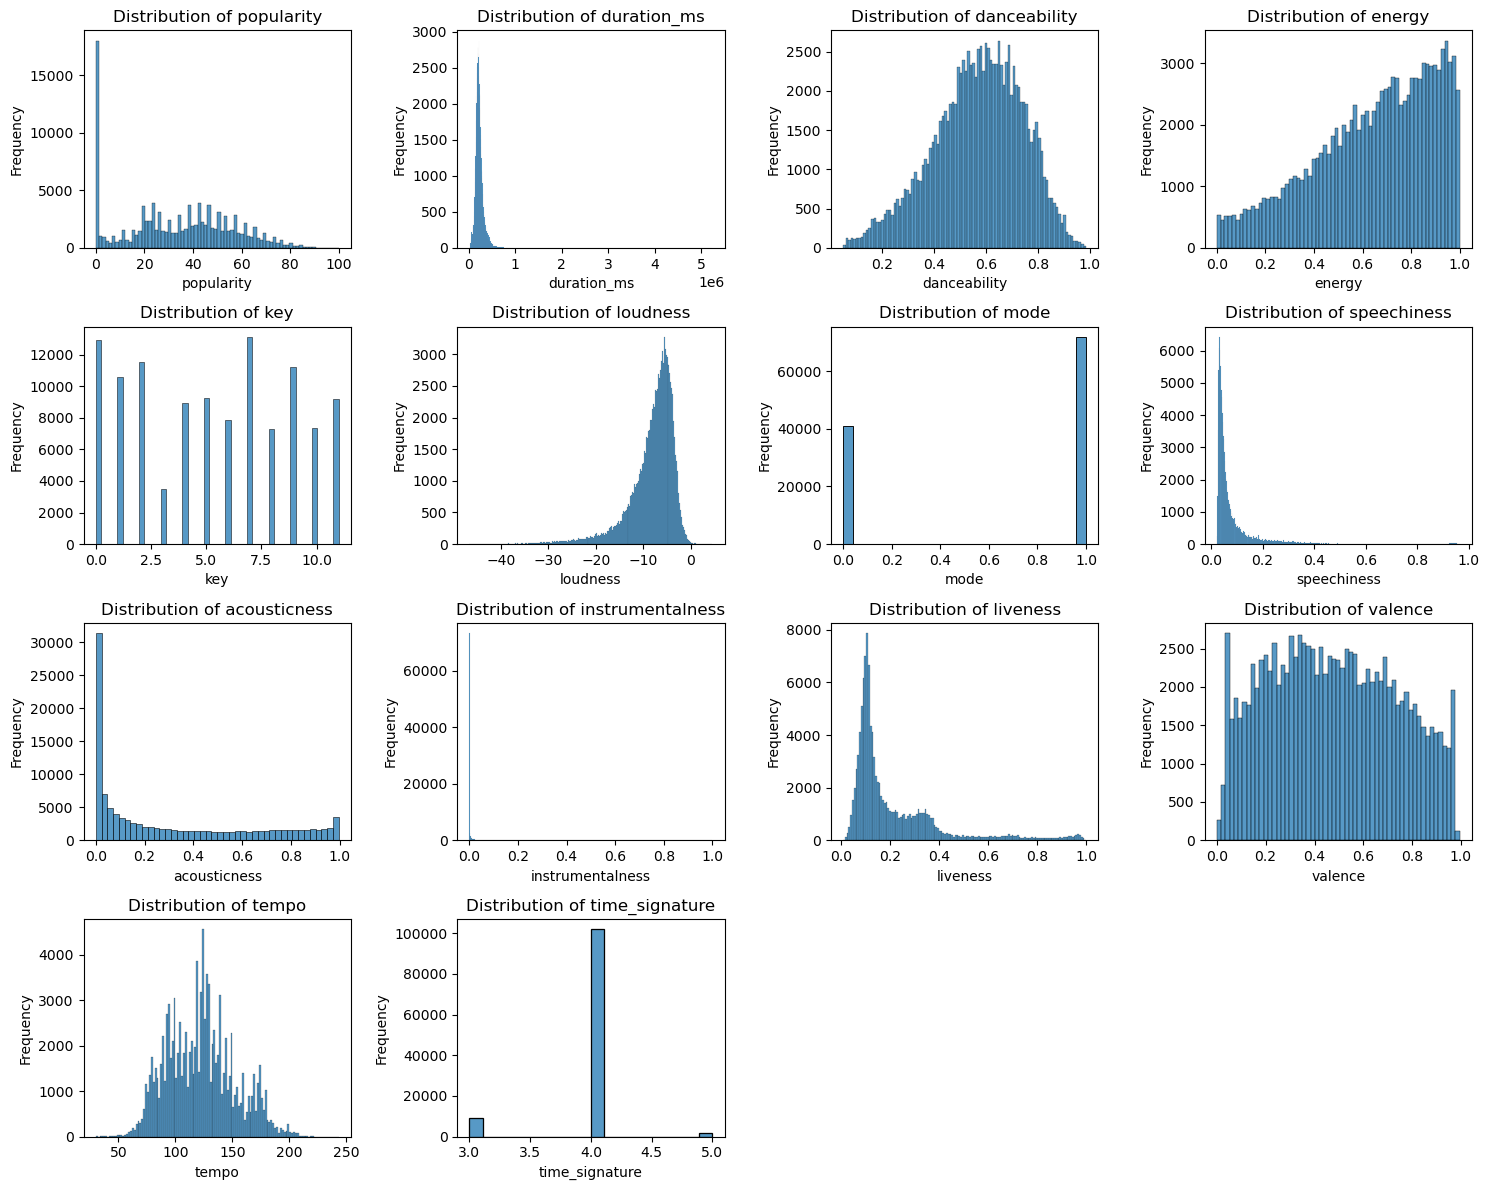

In [11]:
n_cols = 4
n_rows = (len(quantitative_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 12))
axes = axes.flatten()

for i, var in enumerate(quantitative_vars):
    sns.histplot(df[var], ax = axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    
for i in range(len(quantitative_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

The distribution of popularity has a right skew, with most tracks having a popularity of 0, and the reamining tracks having an approximately normal distribution. Very few tracks have a popularity of more than 80.

The distribution of duration_ms is skewed to the right, with the majority of tracks having durations close to the median, which is around 3.5 minutes. The long tail to the right suggests that there are some exceptionally long tracks in the dataset.

Danceability has an approximately normal distribution with a very slight skew toward lower danceability scores.

Energy, however, has an extremely left-skewed distribution, suggesting the majority of tracks have relatively high energy.

The distribution of key is roughly bimodal, with the most common keys being 0 and 7.

Loudness has an extremely left-skewed distribution, with most tracks centered around -7. Vey few tracks have a loudness lower then -30.

When looking at modality, we can see there are a bit less than twice as many major tracks than minor tracks.

Speechiness is extremely skewed to the right, with most tracks having a speechiness centered around 0.04. Barely any tracks have a speechiness greater than 0.25. According to the data description, values below 0.33 most likely represent music/other non-speech-like tracks, meaning this dataset contains mostly music, with very few podcasts or talk shows.

Like speechiness, acousticness is extremely skewed to the right, with most tracks having an acousticness centered around 0.17.

Instrumentalness is probably the most interesting of them all; most tracks have an instrumentalness of essentially 0. In fact, about 80% of the tracks in the dataset have an instrumentalness of < 0.1. Only 13 songs have an instrumentalness of 1.

Liveness is also extremely skewed to the right, with most values being centerd around 0.13. This suggests most tracks were not recorded/performed in front of a live audience.

Valence, however, is roughly normally distributed, with the median at 0.46. This suggests there is a even mix of positive/negative tracks in the dataset.

The distribution of tempo is also approximately normally distributed. This suggests dataset contains a good variety of fast-paced, slow-paced, and medium-paced tracks.

Most tracks in this dataset have a time signature of 4, with fewer having a time signature of 3 or 5. No tracks in this dataset have a time signature of 6 or 7.

### Correlation Matrix

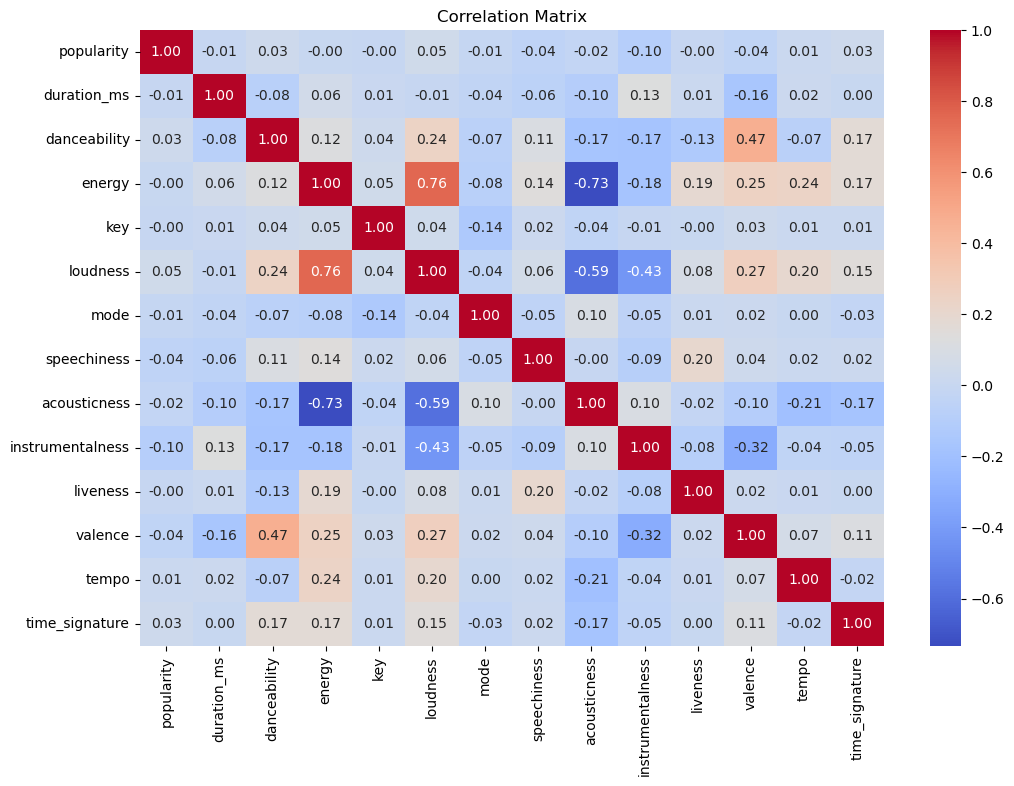

In [12]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[quantitative_vars].corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

After observing the correlation matrix above, we can make a few conclusions:
- Danceability has a moderate positive correlation with valence. This suggests tracks with a more positive vibe are more likely to be danced to, while tracks with a less positive vibe are less likely to be danced to.
- Energy has a strong positive correlation with loudness. This suggests tracks with greater energy are louder, while tracks with less energy are quieter, which makes intuitive sense.
- Energy has a strong negative correlation with acousticness.
- Loudness has a moderate negative correlation with acousticness.
- Loudness has a moderate negative correlation with instrumentalness.

### The "Explicit" Variable

In [13]:
df['explicit'].value_counts()

False    103197
True       9666
Name: explicit, dtype: int64

The majority of the records in this dataset aren't explicit.

### The Genres

In [14]:
df['track_genre'].nunique()

114

In [15]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [16]:
df['track_genre'].value_counts().to_dict()

{'rock': 1000,
 'salsa': 1000,
 'dance': 1000,
 'house': 1000,
 'chicago-house': 1000,
 'country': 999,
 'detroit-techno': 999,
 'mandopop': 999,
 'drum-and-bass': 999,
 'cantopop': 999,
 'dancehall': 999,
 'breakbeat': 999,
 'pagode': 999,
 'power-pop': 999,
 'edm': 999,
 'dub': 998,
 'j-idol': 998,
 'j-rock': 998,
 'disco': 998,
 'spanish': 998,
 'forro': 998,
 'deep-house': 998,
 'punk': 998,
 'soul': 998,
 'alt-rock': 998,
 'latin': 998,
 'reggaeton': 998,
 'progressive-house': 998,
 'synth-pop': 998,
 'alternative': 998,
 'songwriter': 997,
 'hard-rock': 997,
 'hardstyle': 997,
 'heavy-metal': 997,
 'honky-tonk': 997,
 'singer-songwriter': 997,
 'punk-rock': 997,
 'samba': 997,
 'rock-n-roll': 997,
 'metal': 997,
 'latino': 997,
 'reggae': 997,
 'groove': 997,
 'goth': 997,
 'gospel': 997,
 'electro': 997,
 'techno': 997,
 'dubstep': 996,
 'industrial': 996,
 'rockabilly': 996,
 'electronic': 996,
 'emo': 996,
 'party': 996,
 'ska': 996,
 'funk': 996,
 'garage': 996,
 'turkish': 9

There are 100 different genres in the dataset, and each genre has anywhere from 800 to 1000 records. As a result, as there is no severe imbalance in the classes we will be predicting, which is good news for our predictive task.

### Do certain genres have higher popularity, on average?

In [19]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().nlargest(10)
genre_popularity

track_genre
pop-film     59.350754
k-pop        57.035211
chill        53.673038
sad          52.433166
indian       49.622449
grunge       49.569416
anime        48.802618
pop          48.616016
emo          48.144578
sertanejo    47.855276
Name: popularity, dtype: float64

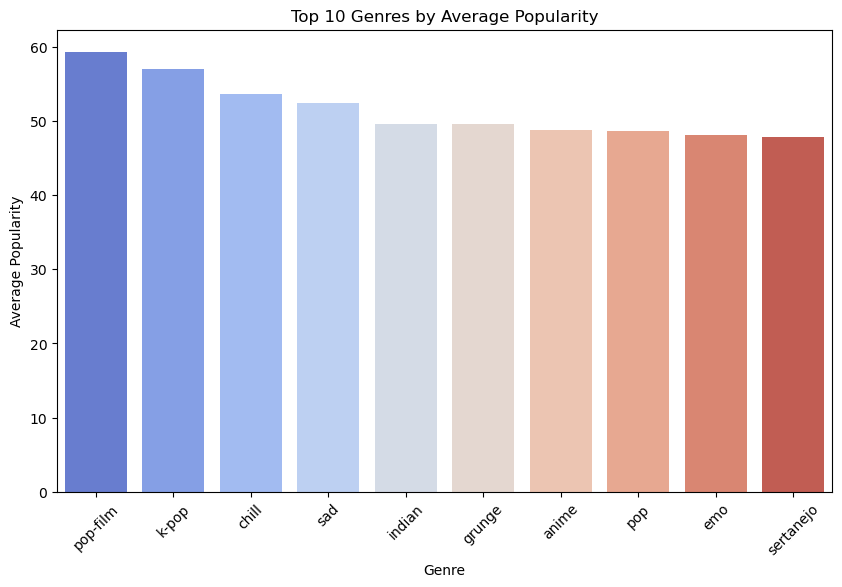

In [18]:
plt.figure(figsize = (10, 6))
sns.barplot(x = genre_popularity.index, y = genre_popularity.values, palette = "coolwarm")
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Top 10 Genres by Average Popularity')
plt.xticks(rotation = 45)
plt.show()

It looks like the genres with the highest popularity are pop-film, k-pop, chill, sad, indian, grunge, anime, pop, emo, and sertanejo. It seems like pop music is very popular!

Interestingly, some of these are niche genres; so, niche genres don't necessarily have lower popularity.

### Danceability vs. Energy - Is there a good relationship?

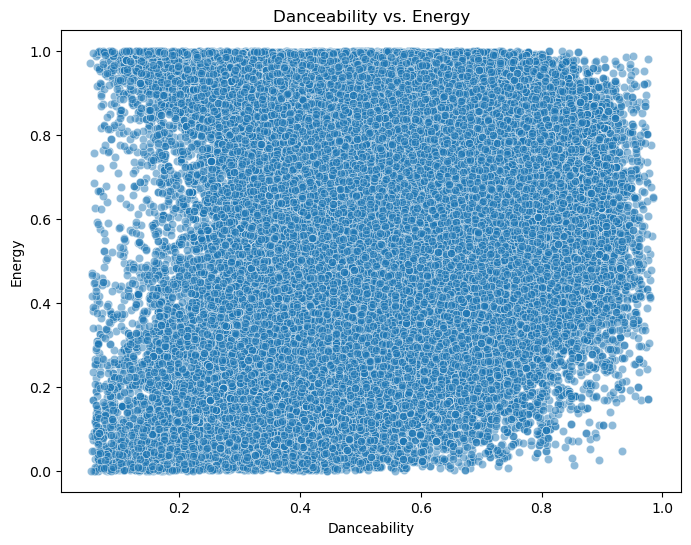

In [20]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df['danceability'], y = df['energy'], alpha = 0.5)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs. Energy')
plt.show()

There is a very poor correlation between danceability vs. energy, which is counterintuitive; we would expect tracks of higher energy to be more likely to be danced to.

### Are explicit songs more popular?

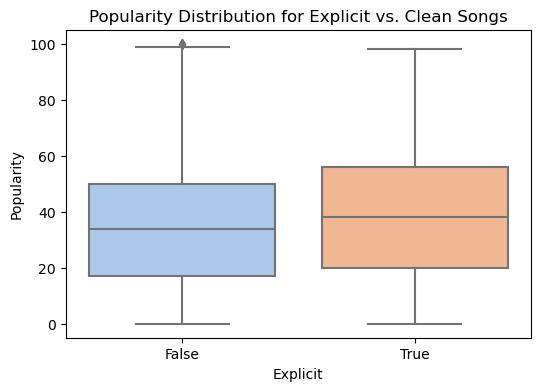

In [22]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = df['explicit'], y = df['popularity'], palette = "pastel")
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.title('Popularity Distribution for Explicit vs. Clean Songs')
plt.show()

It looks like explicit songs are slightly more popular than clean songs, but only barely; the difference does not seem to be significant.

### Which genres have the most danceable songs?

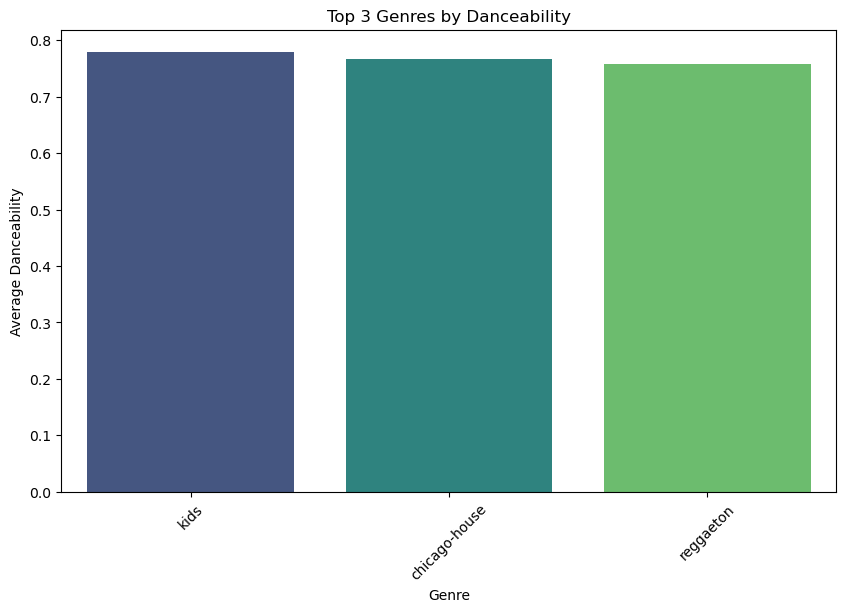

In [24]:
genre_danceability = df.groupby('track_genre')['danceability'].mean().nlargest(3)

plt.figure(figsize = (10, 6))
sns.barplot(x = genre_danceability.index, y = genre_danceability.values, palette = "viridis")
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.title('Top 3 Genres by Danceability')
plt.xticks(rotation = 45)
plt.show()

It looks like kids, chicago-house, and reggaeton are the most danceable genres.

### Are longer songs less popular?

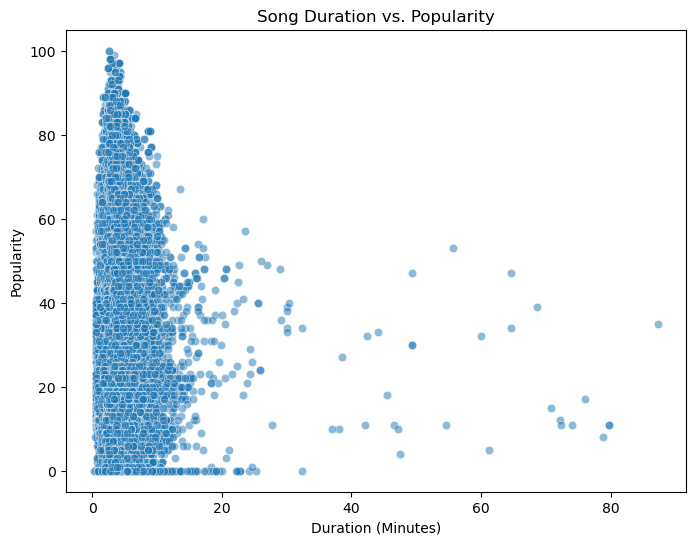

In [25]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df['duration_ms'] / 60000, y = df['popularity'], alpha = 0.5)
plt.xlabel('Duration (Minutes)')
plt.ylabel('Popularity')
plt.title('Song Duration vs. Popularity')
plt.show()

Generally, it looks like longer tracks are less popular. After the 15-minute mark, popularity scores start to taper off., but before the 15-minute mark, popularity scores are pretty evenly spread.

## Predictive Task

We will aim to predict the genre of a song based on its features.

Accuracy – Measures how often the model predicts the correct genre. Works well if genres are balanced, which is the case here.

## Baseline Model(s)

- k-Nearest Neighbors (k-NN): Classifies a song based on its closest neighbors in feature space. A simple yet effective approach.
- Logistic Regression: Though primarily used for binary classification, it can handle multi-class classification well with one-vs-rest (OvR).